<a href="https://colab.research.google.com/github/ramtiin/Predicting-YouTube-Dislikes-using-Machine-Learning/blob/main/Predicting_YouTube_Dislikes_(bag_of_words_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses a different technique called **bag-of-words (BoW)** instead of VADER and sentiment analysis and showed a lower MAE of around 2,700 which is more accurate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Downloading the dataset:**

For downloading datasets from Kaggle, you will need an API key.

To find your API credentials, follow these steps:

1.   After signing in to https://kaggle.com/, select "My Account" from the menu on the top right. 
2.   Click "Create New API Token" under the "API" section. This will download a file kaggle.json.

Then upload kaggle.json file to this notebook and run the following codes:


In [2]:
! pip install -q kaggle

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

! kaggle datasets download -d dmitrynikolaev/youtube-dislikes-dataset

 78% 46.0M/58.8M [00:00<00:00, 93.7MB/s]
100% 58.8M/58.8M [00:00<00:00, 108MB/s] 


In [3]:
! unzip youtube-dislikes-dataset.zip

Archive:  youtube-dislikes-dataset.zip
  inflating: video_IDs/unique_ids_CA.txt  
  inflating: video_IDs/unique_ids_GB.txt  
  inflating: video_IDs/unique_ids_GB_CA_US.txt  
  inflating: video_IDs/unique_ids_US.txt  
  inflating: video_IDs/unique_ids_from_kaggle.txt  
  inflating: youtube_dislike_dataset.csv  


In [4]:
df = pd.read_csv("youtube_dislike_dataset.csv")

In [5]:
df


,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...


**Installing necessary packages:**

In [8]:
!pip install texthero
!pip install catboost
!pip install shap

  Using cached texthero-1.1.0-py3-none-any.whl (24 kB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached Unidecode-1.3.4-py3-none-any.whl (235 kB)
  Using cached regex-2022.3.15-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (749 kB)
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 76.1 MB 54 kB/s 
     |████████████████████████████████| 564 kB 5.0 MB/s 


**Cleaning texts:**

In [9]:
import texthero as hero
from texthero import preprocessing

clean_df = df.drop(['video_id','published_at','channel_id','channel_title','description','comments'],axis=1)

clean_df['title'] = clean_df['title'].pipe(hero.clean,[preprocessing.remove_urls , preprocessing.clean])
clean_df['tags'] = clean_df['tags'].pipe(hero.clean,[preprocessing.remove_urls , preprocessing.clean])
clean_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,view_count,likes,dislikes,comment_count,tags
0,jadon sancho magical skills goals,1048888,19515,226,1319,football soccer ftbol alemn bundesliga season ...
1,migos avalanche official video,15352638,359277,7479,18729,migos avalanche quality control music motown r...
2,supporting actress comedy 73rd emmys,925281,11212,401,831,
3,jo1 young jo1 ver performance video,2641597,39131,441,3745,produce101japan jo1 thestar stargazer protosta...
4,retaining walls collapse,715724,32887,367,1067,retaining wall new jersey highway direct conne...
...,...,...,...,...,...,...
37417,lil tjay calling phone feat 6lack official video,120408275,2180780,35871,81360,lil tjay steady calling phone calling phone ti...
37418,pelicans lakers full game highlights january,2841917,20759,1049,2624,nba g league basketball game lakers pelicans p...
37419,mv mamamoo,13346678,720854,4426,90616,mamamoo waw waw mamamoo waw wawn wawn
37420,fellipe escudero master podcast,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...


**Creating bag-of-words:**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

bag_of_words_df = pd.DataFrame()

TOP_N_WORDS = 10

for text_column in ['title','tags']:
  vec = CountVectorizer(max_features = TOP_N_WORDS)
  txt_to_fts = vec.fit_transform(clean_df[text_column]).toarray()
  txt_to_fts.shape

  names = vec.get_feature_names_out()
  print("Top repeated words for {}:".format(text_column),names)

  txt_fts_names = [text_column + f'_word_{i}_count' for i in range(TOP_N_WORDS)]
  bag_of_words_df[txt_fts_names] = txt_to_fts


Top repeated words for title: ['de' 'highlights' 'minecraft' 'music' 'new' 'official' 'shorts' 'trailer'
 'video' 'vs']
Top repeated words for tags: ['football' 'funny' 'highlights' 'league' 'minecraft' 'new' 'news'
 'united' 'video' 'vs']


**Merging data:**

In [11]:
merged_df = pd.concat([clean_df,bag_of_words_df],axis=1).drop(["tags","title"],axis=1)

**Specify input variables (X) and an output variable (y):**

In [12]:
X = merged_df.drop(['dislikes'],axis=1)
y = merged_df['dislikes']

**Traning and testing our model by K-fold cross-validation method:**

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

folds = 5

regressor = CatBoostRegressor(silent=True)

pipeline = Pipeline([ ('estimator', regressor)])

cv = KFold(n_splits=folds)
scores = cross_val_score(pipeline, X, y,cv = cv , scoring='neg_mean_absolute_error')

# Results:

In [26]:
print(scores)

[-2502.5  -2940.65 -2894.39 -2731.46 -2470.32]


In [27]:
print(scores.mean())

-2707.864441259917


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
cat_regressor = CatBoostRegressor(silent=True)
cat_regressor.fit(X_train,y_train)

**The impact of each feature on the model output:**

*For having a cleaner plot, we remove outliers using Z-scores.*

In [19]:
import scipy.stats as stats
z_scores = stats.zscore(X_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1).all(axis=1)
new_X = X_train[filtered_entries]

In [20]:
import shap
explainer = shap.TreeExplainer(cat_regressor)
shap_values = explainer.shap_values(new_X)

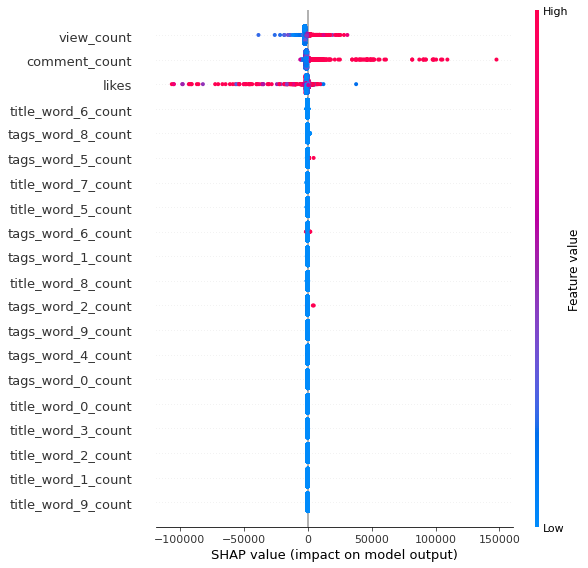

In [21]:
shap.summary_plot(shap_values, new_X)

**The relationship between MAE and video dislike quantity:**

In [22]:
from sklearn.metrics import mean_absolute_error
errors = []
ys = []
for i in range (np.min(y_test)+1,np.max(y_test),1000):
  ys.append(i)
  slected_y_test = y_test[y_test<i]
  slected_x_test = X_test[y_test<i]
# Predicting the Test set results
  y_pred = cat_regressor.predict(slected_x_test)
  np.set_printoptions(precision=2)
  errors.append(mean_absolute_error(slected_y_test, y_pred))

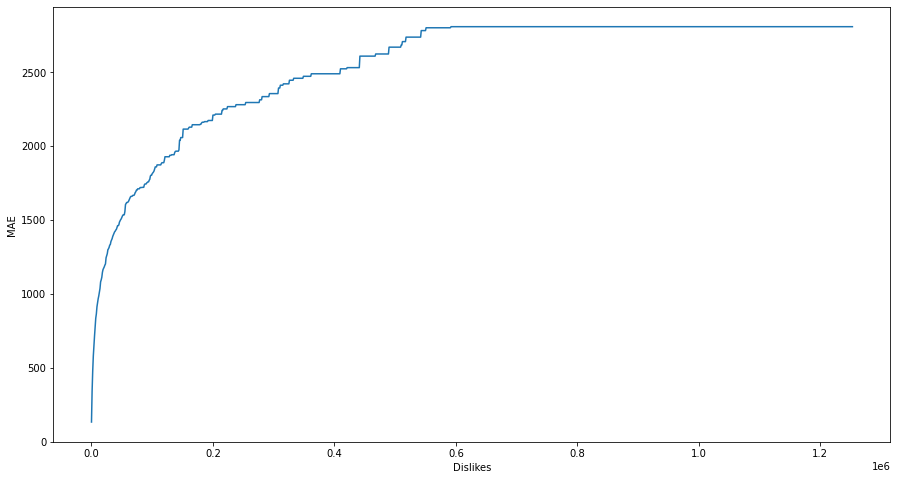

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(ys ,errors)
plt.xlabel("Dislikes")
plt.ylabel("MAE")
plt.show()

**The relationship between MAE and video views quantity:**

In [24]:
from sklearn.metrics import mean_absolute_error
errors = []
ys = []
for i in range (np.min(X_test['view_count'])+1,np.max(X_test['view_count']),100000):
  ys.append(i)
  selected_y_test = y_test[X_test['view_count']<i]
  selected_x_test = X_test[X_test['view_count']<i]
# Predicting the Test set results
  y_pred = cat_regressor.predict(selected_x_test)
  np.set_printoptions(precision=2)
  errors.append(mean_absolute_error(selected_y_test, y_pred))

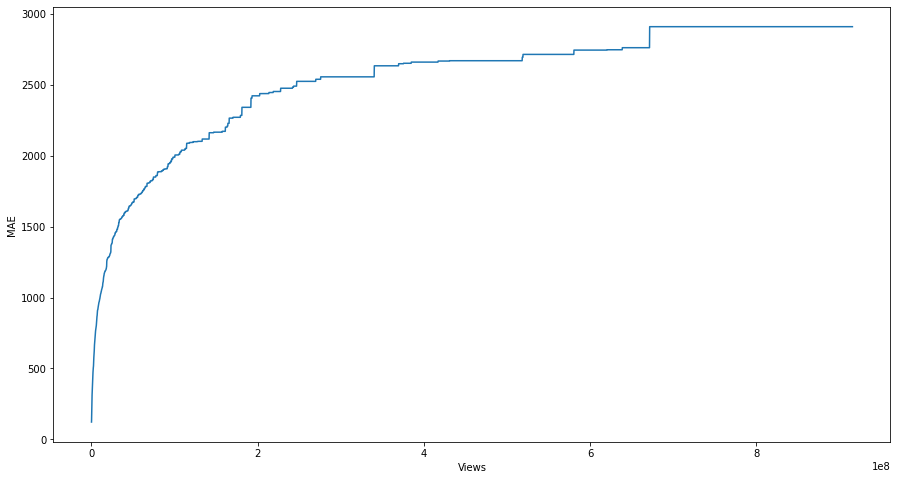

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(ys ,errors)
plt.xlabel("Views")
plt.ylabel("MAE")
plt.show()